![example](images/director_shot.jpeg)

Microsoft Film Analysis

**Author:** Andre Layton
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

Microsoft is creating a new movie studio division in an effort to compete with other big companies, such as Apple, that have put out diverse media content. This project aims to analyze movie data from various sources and recommend the best types of films to create for the studio's initial content. The main focus behind the analysis is seeing which films are best to begin creating by calculating and comparing both the Domestic and Worldwide returns on investment (ROI), both measured in percentages. 

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [67]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [68]:
# Loading movie_budgets.csv file
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv.gz')

In [69]:
# Using .info() method to list preliminary information
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [70]:
# Listing the first 20 records
movie_budgets_df.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [71]:
# Using .info() method after making a query to select all fields in the movie_basics table
conn = sqlite3.connect('im.db')
pd.read_sql("""
SELECT *
FROM movie_basics
""", conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [72]:
# Query and list the first 20 items
pd.read_sql("""
SELECT *
FROM movie_basics
""", conn).head(20)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
    
    -Only keep "primary_title" and "genres" from database table, and drop the "release_date" field from the dataframe. Use those 
    variables to prepare ROI columns - both domestic and global returns.
    
    
* How did you address missing values or outliers?
    
    -Fortunately, the dataframe is not missing any data so there's no issue there; we will see if there is any data missing after joining database fields we want with our dataframe. Once we see if there is any missing values, we will circle back to how we will address the issue.
    
    
* Why are these choices appropriate given the data and the business problem?
***

In [73]:
# Let's clean up the movie_budgets dataframe first to fit what we need for analysis:

# we'll start by dropping any columns we don't need, like the id column
movie_budgets_df2 = movie_budgets_df.drop('id', axis=1)

# We'll clean up the column names as well
new_column_names = {'release_date': 'Release Date', 'movie':'Movie Name', 'production_budget': 'Production Budget', 'domestic_gross': 'Domestic Gross',
                    'worldwide_gross': 'Worldwide Gross'}
df3 = movie_budgets_df2.rename(columns=new_column_names)

# Next, changing the column types of the last three columns from 'object' to 'int' for future statistical analysis
numeric_columns = ['Production Budget', 'Domestic Gross', 'Worldwide Gross']
for column in numeric_columns:
    df3[column] = df3[column].map(lambda x: int(x.replace('$', '').replace(',', '')))

# Lastly, we'll clean up the movie names, since that will be the field we use to link the movie_basics table shortly
df3['Movie Name'] = df3['Movie Name'].map(lambda x: x.replace('â', '\''))
print(df3.info())
df3.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Release Date       5782 non-null   object
 1   Movie Name         5782 non-null   object
 2   Production Budget  5782 non-null   int64 
 3   Domestic Gross     5782 non-null   int64 
 4   Worldwide Gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB
None


,Release Date,Movie Name,Production Budget,Domestic Gross,Worldwide Gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000,309420425,963420425
8,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,"Nov 6, 2015",Spectre,300000000,200074175,879620923


In [74]:
# Next, we'll clean up the SQL table to fit our needs:

# First, we'll rename and keep the columns we need (i.e., primary_title, original_title, genres)
movie_basics_df = pd.read_sql("""
SELECT primary_title AS 'Movie Name', original_title AS 'Original Title', genres AS Genres
FROM movie_basics
""", conn)

# Next, we'll join the two DataFrames together
final_df = pd.merge(df3, movie_basics_df, on='Movie Name')

# Create a new column to identify which records are incorrectly matched
final_df.loc[final_df['Movie Name'] == final_df['Original Title'], 'Titles Match'] = True
final_df.loc[final_df['Movie Name'] != final_df['Original Title'], 'Titles Match'] = False
incorrect_pairs = final_df[final_df['Titles Match'] == False]

# Find any missing values in the Original Title & Genres fields
incorrect_pairs['Original Title'].isna().loc[incorrect_pairs['Original Title'].isna() == True]
incorrect_pairs['Genres'].isna().loc[incorrect_pairs['Genres'].isna() == True]

# Decision: Remove records
final_df = final_df.dropna()

# Changing written numbers in the Original Title and Movie Name fields to numeric form
def word_to_number(title):
    words = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine", "Ten"]

    for word in words:
        if word in title:
            start = title.index(word)
            end = start + len(word)
            extracted_word = title[start:end]
            title = title.replace(word, str(words.index(extracted_word)))
    return title

final_df['Original Title'] = final_df['Original Title'].map(lambda x: word_to_number(x))
final_df['Movie Name'] = final_df['Movie Name'].map(lambda x: word_to_number(x))

# Rerun earlier code to identify identical titles in Title Match column
final_df.loc[final_df['Movie Name'] == final_df['Original Title'], 'Titles Match'] = True
incorrect_pairs = final_df[final_df['Titles Match'] == False]

# Drop all records in incorrect_pairs object from the dataset for final cleanup
final_df = final_df.loc[final_df['Titles Match'] == True]

# Get rid of duplicates for final table
final_df = final_df.drop_duplicates()
final_df.head(25)

,Release Date,Movie Name,Production Budget,Domestic Gross,Worldwide Gross,Original Title,Genres,Titles Match
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy",True
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix,"Action,Adventure,Sci-Fi",True
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",True
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,"Action,Adventure,Sci-Fi",True
5,"Nov 17, 2017",Justice League,300000000,229024295,655945209,Justice League,"Action,Adventure,Fantasy",True
6,"Nov 6, 2015",Spectre,300000000,200074175,879620923,Spectre,"Action,Adventure,Thriller",True
7,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,"Action,Thriller",True
8,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,Solo: A Star Wars Story,"Action,Adventure,Fantasy",True
9,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,The Lone Ranger,"Action,Adventure,Western",True
10,"Mar 9, 2012",John Carter,275000000,73058679,282778100,John Carter,"Action,Adventure,Sci-Fi",True


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?

-create a function to calculate ROI (gross/budget *100) & create a column for it

-take the value counts of genres

-Genres vs. ROI, frequency count of genres

* How did you iterate on your initial approach to make it better?

-


* Why are these choices appropriate given the data and the business problem?

-


***

In [75]:
# First, we're going to calculate and create a column labeled Domestic ROI from Domestic Gross
final_df['Domestic ROI (%)'] = (final_df['Domestic Gross'].divide(final_df['Production Budget'])) * 100
    
# Next, calculate and create a column labeled Worldwide ROI from Worldwide Gross
final_df['Worldwide ROI (%)'] = (final_df['Worldwide Gross'].divide(final_df['Production Budget'])) * 100

# Now let's get a count of all the genres in this dataframe
# First, we'll clean up the Genres field
final_df['Genres'] = final_df['Genres'].map(lambda x: x.split(','))

final_df['Genres'] = final_df['Genres'].transform(lambda x: x[0])
genres_count = final_df['Genres'].value_counts()
genres_count

Drama          699
Action         680
Comedy         512
Documentary    301
Adventure      240
Biography      211
Horror         209
Crime          160
Thriller        71
Animation       35
Sci-Fi          25
Fantasy         20
Family          19
Romance         16
Mystery         15
Music            9
Western          7
Musical          6
War              4
Sport            3
Name: Genres, dtype: int64

In [76]:
final_df.describe()

,Production Budget,Domestic Gross,Worldwide Gross,Domestic ROI (%),Worldwide ROI (%)
count,3.242000e+03,3.242000e+03,3.242000e+03,3242.000000,3242.000000
mean,3.381450e+07,4.188401e+07,9.856628e+07,217.106681,422.584235
std,4.591000e+07,7.096883e+07,1.924778e+08,830.144795,1533.228670
min,1.400000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.000000e+06,4.851738e+05,2.274129e+06,9.842309,31.011844
50%,1.700000e+07,1.617063e+07,2.830942e+07,71.628141,152.253142
75%,4.000000e+07,5.177015e+07,9.867782e+07,179.585925,353.236877
max,4.106000e+08,7.000596e+08,2.208208e+09,22764.410000,41656.474000


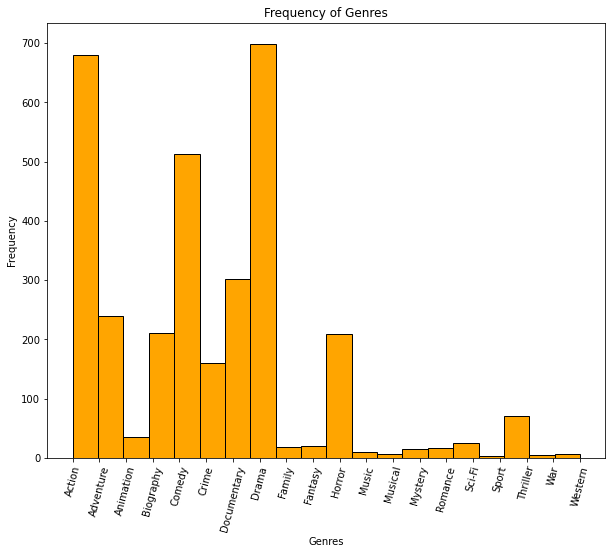

In [77]:
# Now it's time to visualize our data!

# We're going to do 3 visuals: one to see the distribution of genres, and two others
# to compare the genres vs. both the Domestic and Worldwide ROI fields

# First, let's see a visual of the genres within our DataFrame
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(x=final_df['Genres'].sort_values(), color='orange', edgecolor='black', bins=20)
ax.set_xlabel('Genres')
ax.tick_params(axis='x', labelrotation=75)
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Genres');

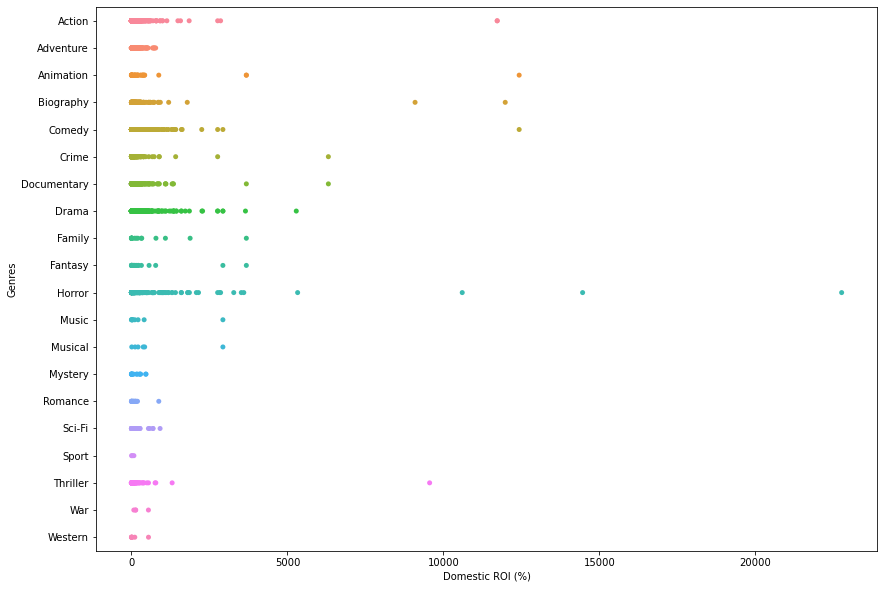

In [78]:
# Next, visualize Genres vs. Domestic ROI
fig, ax = plt.subplots(figsize=(14,10))
sns.stripplot(data=final_df.sort_values('Genres'), x='Domestic ROI (%)', y='Genres', jitter=False);

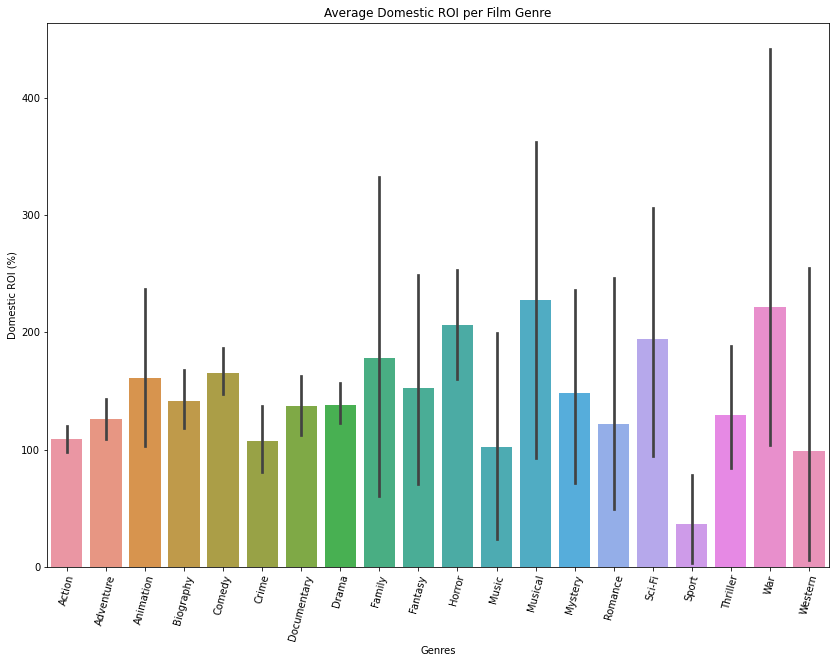

In [79]:
# We see from this initial plot that there are quite a few extreme outliers but also that this type of plot tells us NOTHING
# Therefore, we'll revise our initial approach & instead compare each genres median ROI, both Domestic & Worldwide!

# First, let's filter out these outliers and grab the median of the Domestic ROI for each genre
final_df2 = final_df[final_df['Domestic ROI (%)'] <= 1500]
final_df2.groupby('Genres')['Domestic ROI (%)'].median().reset_index()

# Now, visualize Genres vs. median Domestic ROI
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=final_df2.sort_values('Genres'), y='Domestic ROI (%)', x='Genres')
ax.tick_params(axis='x', labelrotation=75)
ax.set_title('Average Domestic ROI per Film Genre');

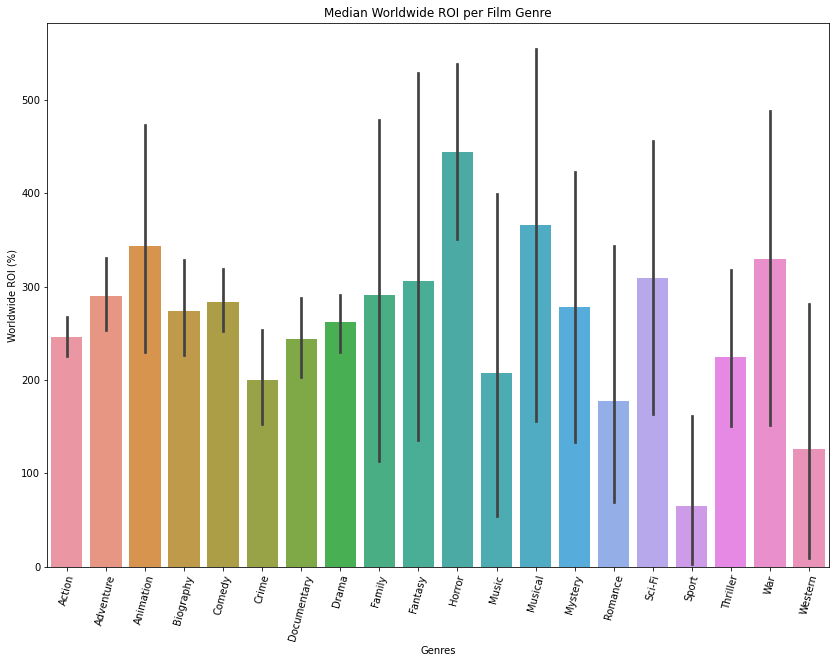

In [80]:
final_df3 = final_df[final_df['Worldwide ROI (%)'] <= 3000]
final_df3.groupby('Genres')['Worldwide ROI (%)'].median().reset_index()

# Now, visualize Genres vs. average Domestic ROI
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=final_df3.sort_values('Genres'), y='Worldwide ROI (%)', x='Genres')
ax.tick_params(axis='x', labelrotation=75)
ax.set_title('Median Worldwide ROI per Film Genre');

In [81]:
# Finish Notebook
# SLIDE DECK
# GitHub push!
# Review code and checklist
conn.close()

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***